In [17]:
from math import gcd
import numpy as np
from functools import reduce
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.special import rel_entr
from sklearn.metrics import mean_squared_error


In [8]:
alphabet = {"ا": 0, "ب": 1, "پ": 2, "ت": 3, "ث": 4, "ج": 5, "چ": 6, "ح": 7, "خ": 8, "د": 9, "ذ": 10, "ر": 11, "ز": 12,
            "ژ": 13, "س": 14, "ش": 15,
            "ص": 16, "ض": 17, "ط": 18, "ظ": 19, "ع": 20, "غ": 21, "ف": 22, "ق": 23, "ک": 24, "گ": 25, "ل": 26, "م": 27,
            "ن": 28,
            "و": 29,
            "ه": 30, "ی": 31}

In [9]:
# mapping from alphabet to index and its reverse

farsi_alphabet = alphabet.keys()
print(farsi_alphabet)
reversedDict = {val: key for (key, val) in alphabet.items()}

dict_keys(['ا', 'ب', 'پ', 'ت', 'ث', 'ج', 'چ', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'ژ', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ک', 'گ', 'ل', 'م', 'ن', 'و', 'ه', 'ی'])


In [10]:

def find_gcd(list):
    # find gcd in a list of integers

    x = reduce(gcd, list)
    return x


def repeated_tokens(words):
    # find all factors that have same tokens

    factors = []
    for i in range(len(words)):
        c = 0
        for j in range(i + 1, len(words)):
            c += len(words[j])
            if words[i] == words[j]:
                factors.append(c)
    return factors


def find_key_length(ctext):
    # return candidate key length

    factors = repeated_tokens(ctext)
    print(factors)
    return find_gcd(factors)


def get_freq(ctext, key_len):
    # return frequency of text for each key char

    res = []
    for i in range(key_len):
        res.append(Counter(ctext[i:-1:key_len]))
    return res


def get_dist(text):
    # return distribution of text 

    global farsi_alphabet
    dist = dict.fromkeys(farsi_alphabet, 0)
    for i in range(len(text)):
        dist[text[i]] += 1

    total = sum(dist.values(), 0.0)
    dist = {k: v / total for k, v in dist.items()}
    return dist

def get_dists(text, key_len):
    # return distribution of text for each key char

    res = []
    for i in range(key_len):
        res.append(get_dist(text[i:-1:key_len]))
    return res

def decode(ctext, key):
    # decode ciphertext with a key
    
    global alphabet
    plain_text = ""
    idx = 0
    for word in ctext.split(" "):
        for i in range(len(word)):
            plain_text += list(alphabet.keys())[
                list(alphabet.values()).index((alphabet[word[i]] - alphabet[key[idx]]) % 32)]
            idx += 1
            idx = idx % 4
        plain_text += " "
    return plain_text




In [11]:
ctext = "تپکغج طغعث ژرا عر فرز رکاچق شددچ کوچف ل اچقم هدف ل ظعضم فع قهغج فوضطذ هضچذر ثذرگسدد مصح رگمح فو ژح " \
        "حلثزذ ها ثح هوچرگ غجثوظ عخدظدس خغ ذثزغ چ وضغث ظال کزوضپرم ققف ما شد گطکسم فچع جطدحچ هخفلزز لچ ط " \
        "میوص جسلغجگا وچفچ اچق چطث حنب شحنض کع ل ققف معش وضغث حجطعع خطغ گلص ذرد ظعضم سیسم فچع " \
        "گطکس ل کد حلثزد خغ ذف جطدحچ غیسوف عخد محرخص مجلد بفچ ط دخ معش وضغث حجطعع خطغ ضمغعچ معش " \
        "حفرز له قطف وب دخ جطدگا ژح توذظدو فخرالط خ گطکسمظد زجطدحچ ققف فرز رکاچق معش حفرزدوص زر هاضخوضث " \
        "جعصدح فرز ژر فخر ل غغ رنض جرگ ژح زخ تیفم غقس هوچف ل فطرگ ژح فلب اذوصز رگغج تم ژث ثظکحرگه شحوض " \
        "صرق وچلن هدفگه بد وژجخگ کچ عواخ"


In [12]:
key_length = find_key_length(ctext.split(" "))

print("key length: ", key_length)


[320, 352, 320, 8, 152, 192, 344, 368, 144, 184, 336, 360, 168, 228, 308, 328, 128, 80, 156, 60, 208, 80, 96, 108, 40, 192, 216, 148, 76, 96, 156, 76, 76, 76, 152, 176, 36, 20, 80, 60, 80, 100, 32, 24, 20]
key length:  4


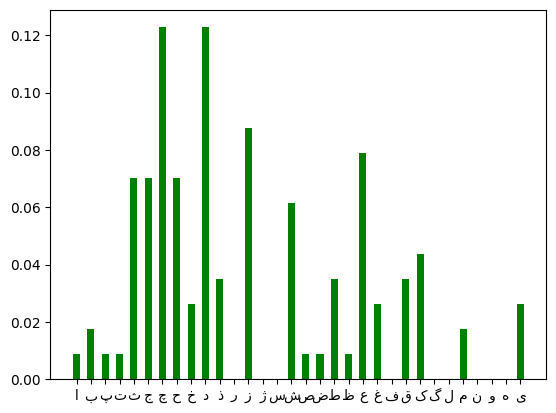

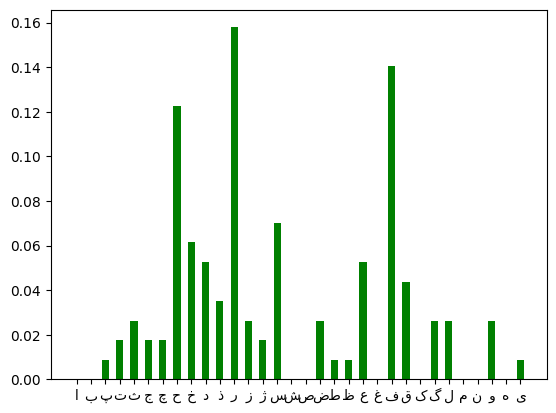

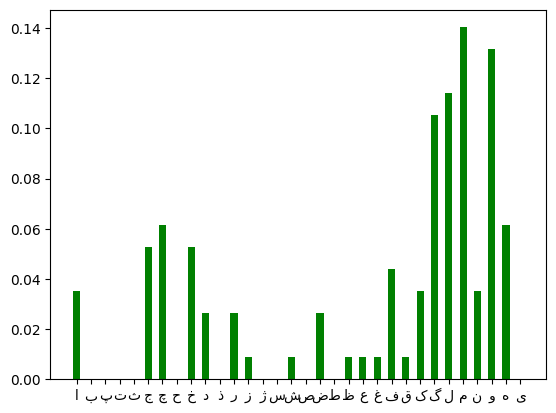

<BarContainer object of 32 artists>

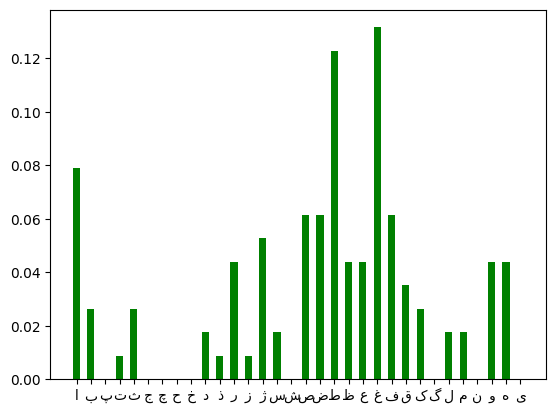

In [14]:
dists = get_dists(ctext.replace(' ', ''), key_length)

plt.bar(dists[0].keys(), dists[0].values(), 0.5, color='g')
plt.show()
plt.bar(dists[1].keys(), dists[1].values(), 0.5, color='g')
plt.show()
plt.bar(dists[2].keys(), dists[2].values(), 0.5, color='g')
plt.show()
plt.bar(dists[3].keys(), dists[3].values(), 0.5, color='g')

In [15]:

farsi_dist = {"ا": 0.1441, "ب": 0.0421, "پ": 0.0069, "ت": 0.0519, "ث": 0.0009, "ج": 0.0124, "چ": 0.0043, "ح": 0.0097, "خ": 0.0139, "د": 0.0746, "ذ": 0.0014, "ر": 0.0852, "ز": 0.0209,
            "ژ": 0.0007, "س": 0.0327, "ش": 0.0265,
            "ص": 0.0066, "ض": 0.0029, "ط": 0.0062, "ظ": 0.0022, "ع": 0.0153, "غ": 0.0019, "ف": 0.0156, "ق": 0.0116, "ک": 0.0299, "گ": 0.0169, "ل": 0.0268, "م": 0.0566,
            "ن": 0.0711,
            "و": 0.0619,
            "ه": 0.0551, "ی": 0.0911}

In [16]:

freqs = get_freq(ctext.replace(' ', ''), key_length)

print(freqs[0])
print(freqs[1])
print(freqs[2])
print(freqs[3])


Counter({'چ': 14, 'د': 14, 'ز': 10, 'ع': 9, 'ج': 8, 'ث': 8, 'ح': 8, 'ش': 7, 'ک': 5, 'ط': 4, 'ذ': 4, 'ق': 4, 'خ': 3, 'غ': 3, 'ی': 3, 'م': 2, 'ب': 2, 'ت': 1, 'پ': 1, 'ظ': 1, 'ض': 1, 'ا': 1, 'ص': 1})
Counter({'ر': 18, 'ف': 16, 'ح': 14, 'س': 8, 'خ': 7, 'د': 6, 'ع': 6, 'ق': 5, 'ذ': 4, 'ض': 3, 'ث': 3, 'و': 3, 'ز': 3, 'ل': 3, 'گ': 3, 'ژ': 2, 'چ': 2, 'ج': 2, 'ت': 2, 'پ': 1, 'ط': 1, 'ظ': 1, 'ی': 1})
Counter({'م': 16, 'و': 15, 'ل': 13, 'گ': 12, 'ه': 7, 'چ': 7, 'خ': 6, 'ج': 6, 'ف': 5, 'ک': 4, 'ا': 4, 'ن': 4, 'ر': 3, 'د': 3, 'ض': 3, 'غ': 1, 'ش': 1, 'ز': 1, 'ع': 1, 'ظ': 1, 'ق': 1})
Counter({'غ': 15, 'ط': 14, 'ا': 9, 'ف': 7, 'ض': 7, 'ص': 7, 'ژ': 6, 'ع': 5, 'ر': 5, 'و': 5, 'ه': 5, 'ظ': 5, 'ق': 4, 'ث': 3, 'ب': 3, 'ک': 3, 'د': 2, 'س': 2, 'م': 2, 'ل': 2, 'ز': 1, 'ذ': 1, 'ت': 1})


In [20]:

def find_shifts(freq_dict):
    # find number of shifts of the distribution in which mse of two distributions are min
    
    mmse = np.inf
    min_idx = -1
    for i in range(32):
        mse = mean_squared_error(np.fromiter(farsi_dist.values(), dtype=float),np.roll(np.fromiter(freq_dict.values(), dtype=float),i))
        if mmse>mse:
            mmse = mse
            min_idx = i
    return min_idx

In [22]:
def find_key(key_length, dists):
    # calculate the key with distributions
    
    res = ""
    for i in range(key_length):
        shifts = find_shifts(dists[i])
        res += reversedDict[32-shifts]
    return res


In [23]:
key = find_key(key_length, dists)

In [24]:
print(key)

دروغ


In [25]:
print(decode(ctext, key))

لقمان حکیم پسر را گفت امروز طعام مخور و روزه دار و هرچه بر زبان راندی بنویس شبانگاه همه انچه را که نوشتی بر من بخوان انگاه روزهات را بگشا و طعام ختج شبانگاه پسر هر چه نوشته بود خواند دیروقت شد و طعام نتوانست خورد روز دوم نیز چنین شد و پسر هیچ طعام نخورد روز سوم باز هرچه گفته بود نوشت و تا نوشته را بر خواند افتاب روز چهارم طلوع کرد و او هیچ طعام نخورد روز چهارم هیچ نگفت شب پدر از او خواست که کاغذها بیاتجد و نوشتهها بخواند پسر گفت امروز هیچ نگفتهام تا برخوانم لقمان گفت پس بیا و از این نان که بر سفره است بخور و بدان که روز قیامت انان که کم گفتهاند چنان حال خوشی دارند که اکنون تو داری 
